<a href="https://colab.research.google.com/github/mr-lupin007/icg-task/blob/main/Surya_shukla_221109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Distance: 12171.7044 meters
Distance after perturbation: 12165.4413 meters
Relative change in latitude: 0.0000037807


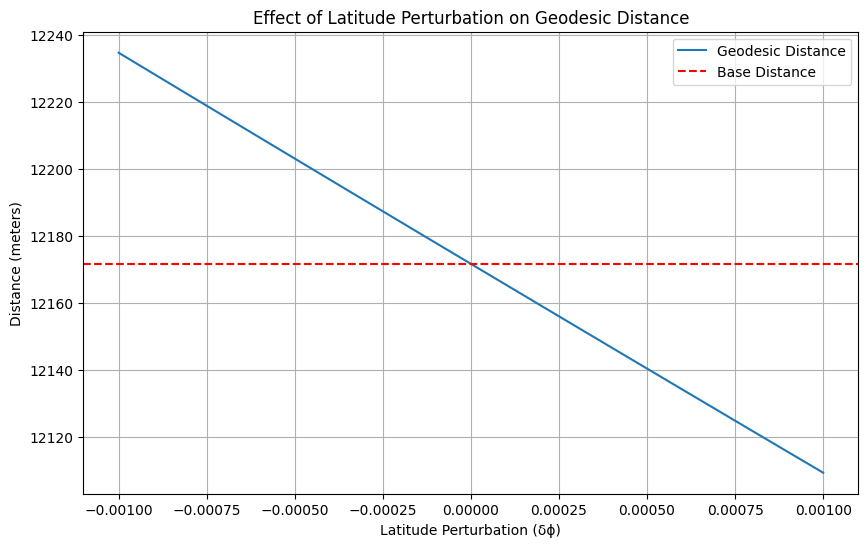

In [3]:
# Import necessary libraries
import pandas as pd  # for data manipulation and analysis
import math  # for mathematical functions
import numpy as np  # for handling arrays and numerical operations
import matplotlib.pyplot as plt  # for creating plots

def calculate_geodesic_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the distance between two points on Earth using the Vincenty formula.

    lat1, lon1: Latitude and Longitude of the first point (in degrees).
    lat2, lon2: Latitude and Longitude of the second point (in degrees).

    Returns the distance in meters.
    """

    # Convert degrees to radians because trigonometric functions in Python work with radians
    φ1 = math.radians(lat1)
    λ1 = math.radians(lon1)
    φ2 = math.radians(lat2)
    λ2 = math.radians(lon2)

    # Define the WGS-84 ellipsoid parameters
    a = 6378137.0  # Earth's radius along the equator in meters (semi-major axis)
    f = 1 / 298.257223563  # Flattening of the Earth
    b = 6356752.314245  # Earth's polar radius in meters (semi-minor axis)

    # Calculate the "reduced latitude," which corrects for Earth's flattening
    U1 = math.atan((1 - f) * math.tan(φ1))
    U2 = math.atan((1 - f) * math.tan(φ2))

    # Calculate the difference in longitude between the two points
    L = λ2 - λ1

    # Initialize variables for iteration to find the correct distance
    λ = L  # Initial guess for the longitude difference
    max_iterations = 200  # Maximum number of iterations to find a solution
    tolerance = 1e-12  # Threshold to determine when the solution has converged

    for _ in range(max_iterations):
        sin_λ = math.sin(λ)
        cos_λ = math.cos(λ)
        sin_σ = math.sqrt((math.cos(U2) * sin_λ) ** 2 + (math.cos(U1) * math.sin(U2) - math.sin(U1) * math.cos(U2) * cos_λ) ** 2)
        cos_σ = math.sin(U1) * math.sin(U2) + math.cos(U1) * math.cos(U2) * cos_λ
        σ = math.atan2(sin_σ, cos_σ)  # Angular separation between the two points
        sin_α = math.cos(U1) * math.cos(U2) * sin_λ / sin_σ  # Azimuthal angle
        cos_sq_α = 1 - sin_α ** 2
        cos2_σm = cos_σ - 2 * math.sin(U1) * math.sin(U2) / cos_sq_α if cos_sq_α != 0 else 0
        C = (f / 16) * cos_sq_α * (4 + f * (4 - 3 * cos_sq_α))
        λ_prev = λ
        λ = L + (1 - C) * f * sin_α * (σ + C * sin_σ * (cos2_σm + C * cos_σ * (-1 + 2 * cos2_σm ** 2)))

        # If the change between iterations is smaller than the tolerance, we assume convergence
        if abs(λ - λ_prev) < tolerance:
            break

    # Final calculations to get the distance
    u_sq = cos_sq_α * (a ** 2 - b ** 2) / (b ** 2)
    A = 1 + (u_sq / 16384) * (4096 + u_sq * (-768 + u_sq * (320 - 175 * u_sq)))
    B = (u_sq / 1024) * (256 + u_sq * (-128 + u_sq * (74 - 47 * u_sq)))
    Δσ = B * sin_σ * (cos2_σm + (B / 4) * (cos_σ * (-1 + 2 * cos2_σm ** 2) - (B / 6) * cos2_σm * (-3 + 4 * sin_σ ** 2) * (-3 + 4 * cos2_σm ** 2)))

    # Calculate the distance between the two points
    distance = b * A * (σ - Δσ)

    return distance

# Define the coordinates for the two locations
lat1, lon1 = 26.4499, 80.3319  # Kanpur
lat2, lon2 = 26.5120, 80.2312  # IIT Kanpur

# Compute the original distance
original_distance = calculate_geodesic_distance(lat1, lon1, lat2, lon2)
print(f"Original Distance: {original_distance:.4f} meters")

# Introduce a small change in latitude and calculate the new distance
delta_latitude = 0.0001
lat1_perturbed = lat1 + delta_latitude
perturbed_distance = calculate_geodesic_distance(lat1_perturbed, lon1, lat2, lon2)
print(f"Distance after perturbation: {perturbed_distance:.4f} meters")

# Calculate the relative change in latitude
relative_change_latitude = abs(lat1_perturbed - lat1) / lat1
print(f"Relative change in latitude: {relative_change_latitude:.10f}")

# Analyze how varying the latitude affects the distance
latitude_changes = np.linspace(-0.001, 0.001, 100)
distances = [calculate_geodesic_distance(lat1 + delta, lon1, lat2, lon2) for delta in latitude_changes]

# Plot the results to visualize the effect of latitude changes on distance
plt.figure(figsize=(10, 6))
plt.plot(latitude_changes, distances, label="Geodesic Distance")
plt.axhline(y=original_distance, color='r', linestyle='--', label="Base Distance")
plt.grid(True)
plt.xlabel("Latitude Perturbation (δϕ)")
plt.ylabel("Distance (meters)")
plt.title("Effect of Latitude Perturbation on Geodesic Distance")
plt.legend()
plt.show()


Original Column Names: Index(['U_n_n_a_m_e_d_:_ _0', 'S_e_n_s_o_r_ _-_1', 'U_n_n_a_m_e_d_:_ _2',
       'U_n_n_a_m_e_d_:_ _3', 'S_e_n_s_o_r_-_2', 'U_n_n_a_m_e_d_:_ _5',
       'U_n_n_a_m_e_d_:_ _6', 'S_e_n_s_o_r_-_3', 'U_n_n_a_m_e_d_:_ _8',
       'U_n_n_a_m_e_d_:_ _9'],
      dtype='object')
Renamed Column Names: Index(['Month', 'Sensor1_Area', 'Sensor1_Wetted_Perimeter',
       'Sensor1_Hydraulic_Radius', 'Sensor2_Area', 'Sensor2_Wetted_Perimeter',
       'Sensor2_Hydraulic_Radius', 'Sensor3_Area', 'Sensor3_Wetted_Perimeter',
       'Sensor3_Hydraulic_Radius'],
      dtype='object')


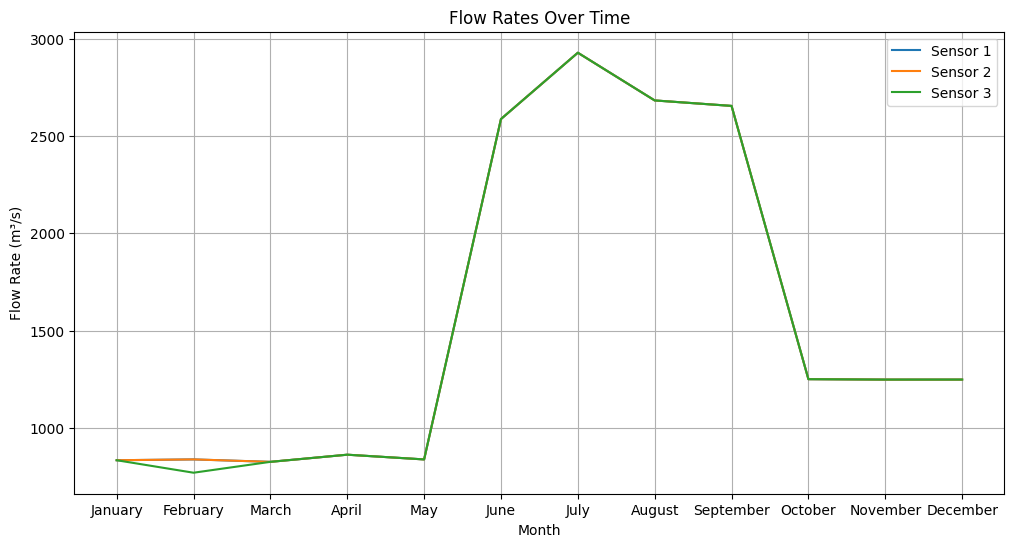

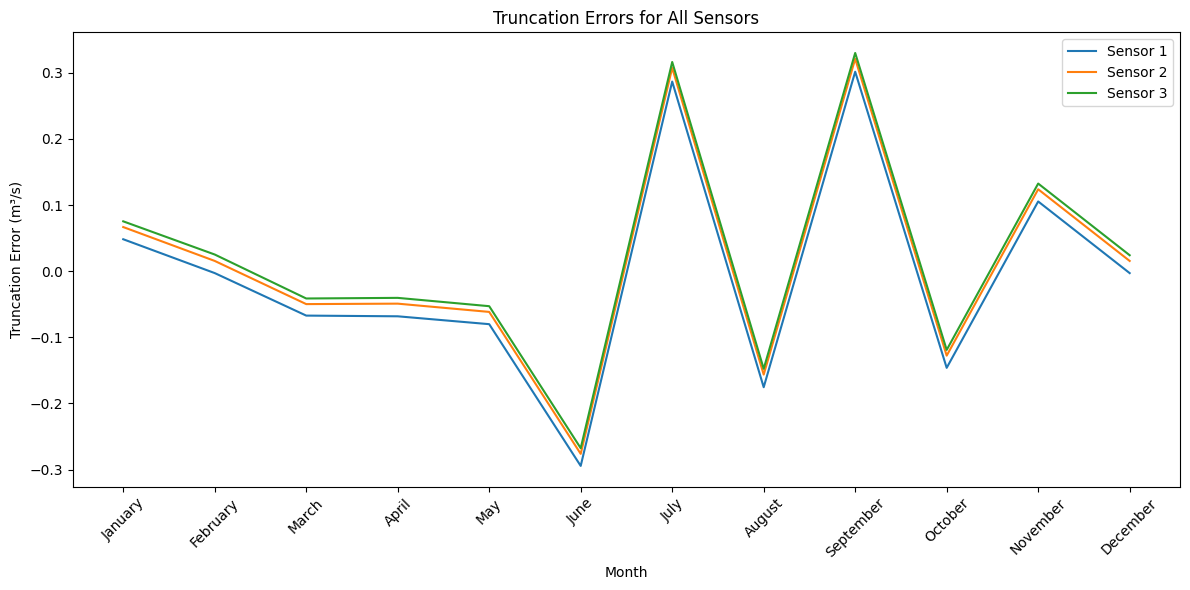

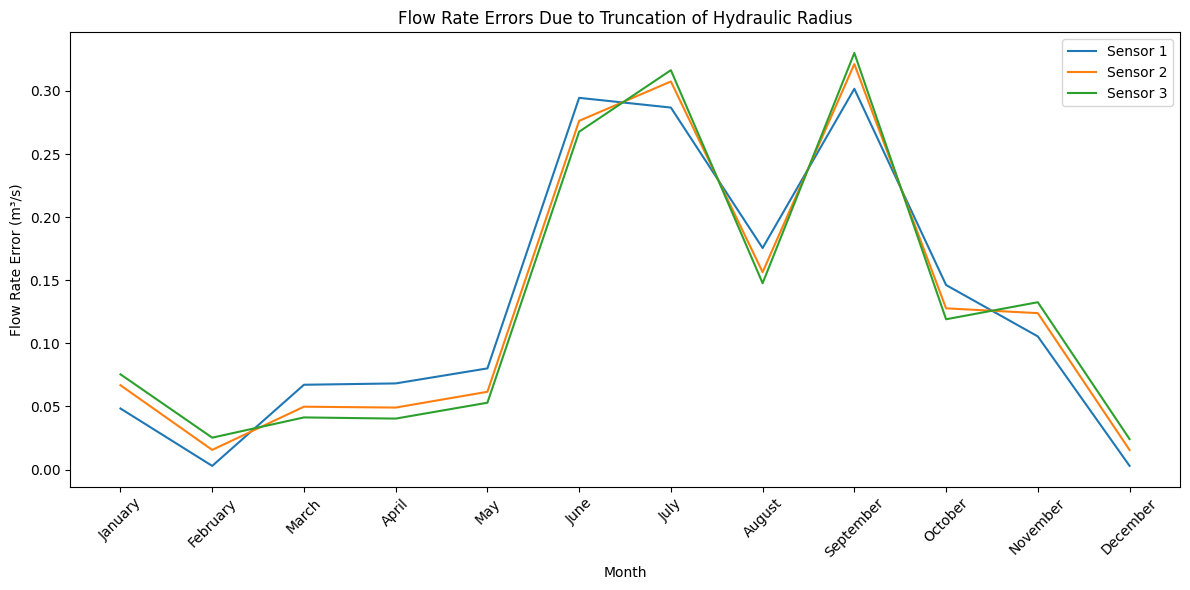

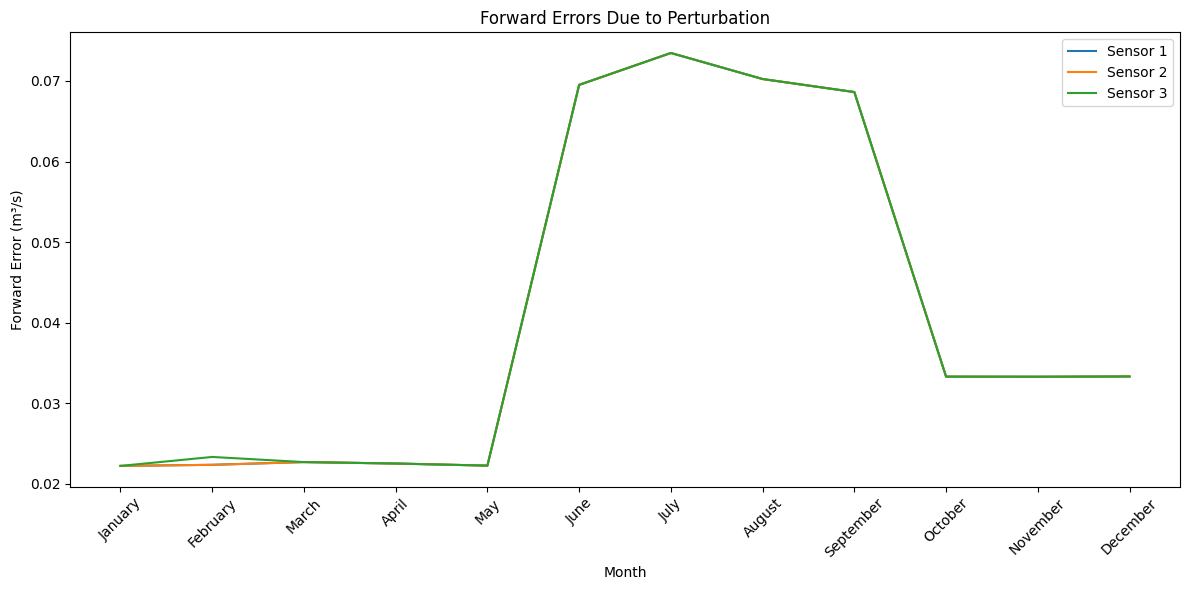

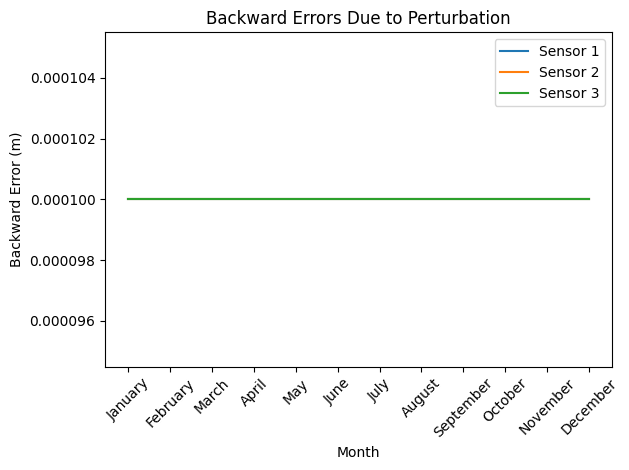

In [4]:
# Manning's Equation Implementation

# Function to calculate flow rate using Manning's equation
def calculate_flow_rate(roughness_coeff, area, hydraulic_radius, slope):
    # Flow rate calculation using Manning's formula
    return (1 / roughness_coeff) * area * hydraulic_radius**(2/3) * slope**(1/2)

# Parameters for Manning's equation
n = 0.035  # Manning's roughness coefficient
S = 0.001  # Slope of the energy grade line

# Load the data from the Excel file
data = pd.read_excel('Table.xlsx')

# Clean up the column names for easier access
data.columns = ['_'.join(col).strip() for col in data.columns.values]
print("Original Column Names:", data.columns)

# Rename columns for clarity and ease of use
data.columns = [
    'Month',
    'Sensor1_Area', 'Sensor1_Wetted_Perimeter', 'Sensor1_Hydraulic_Radius',
    'Sensor2_Area', 'Sensor2_Wetted_Perimeter', 'Sensor2_Hydraulic_Radius',
    'Sensor3_Area', 'Sensor3_Wetted_Perimeter', 'Sensor3_Hydraulic_Radius'
]

print("Renamed Column Names:", data.columns)

# Remove any rows where the 'Month' column is missing
data = data.dropna(subset=['Month'])

# List of columns that should contain numeric data
numeric_columns = [
    'Sensor1_Area', 'Sensor1_Wetted_Perimeter', 'Sensor1_Hydraulic_Radius',
    'Sensor2_Area', 'Sensor2_Wetted_Perimeter', 'Sensor2_Hydraulic_Radius',
    'Sensor3_Area', 'Sensor3_Wetted_Perimeter', 'Sensor3_Hydraulic_Radius'
]

# Convert specified columns to numeric, setting any errors to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate flow rates for each sensor using Manning's equation
data['Flow_Rate_Sensor1'] = calculate_flow_rate(n, data['Sensor1_Area'], data['Sensor1_Hydraulic_Radius'], S)
data['Flow_Rate_Sensor2'] = calculate_flow_rate(n, data['Sensor2_Area'], data['Sensor2_Hydraulic_Radius'], S)
data['Flow_Rate_Sensor3'] = calculate_flow_rate(n, data['Sensor3_Area'], data['Sensor3_Hydraulic_Radius'], S)

# Plot flow rates over time for all sensors
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Flow_Rate_Sensor1'], label='Sensor 1')
plt.plot(data['Month'], data['Flow_Rate_Sensor2'], label='Sensor 2')
plt.plot(data['Month'], data['Flow_Rate_Sensor3'], label='Sensor 3')
plt.xlabel('Month')
plt.ylabel('Flow Rate (m³/s)')
plt.title('Flow Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Round the hydraulic radius values to 3 decimal places to observe truncation effects
data['Truncated_Hydraulic_Radius_Sensor1'] = data['Sensor1_Hydraulic_Radius'].round(3)
data['Truncated_Hydraulic_Radius_Sensor2'] = data['Sensor2_Hydraulic_Radius'].round(3)
data['Truncated_Hydraulic_Radius_Sensor3'] = data['Sensor3_Hydraulic_Radius'].round(3)

# Calculate flow rates using truncated hydraulic radius values
data['Flow_Rate_Truncated_Sensor1'] = calculate_flow_rate(n, data['Sensor1_Area'], data['Truncated_Hydraulic_Radius_Sensor1'], S)
data['Flow_Rate_Truncated_Sensor2'] = calculate_flow_rate(n, data['Sensor2_Area'], data['Truncated_Hydraulic_Radius_Sensor2'], S)
data['Flow_Rate_Truncated_Sensor3'] = calculate_flow_rate(n, data['Sensor3_Area'], data['Truncated_Hydraulic_Radius_Sensor3'], S)

# Calculate truncation errors for each sensor
data['Truncation_Error_Sensor1'] = data['Flow_Rate_Sensor1'] - data['Flow_Rate_Truncated_Sensor1']
data['Truncation_Error_Sensor2'] = data['Flow_Rate_Sensor2'] - data['Flow_Rate_Truncated_Sensor2']
data['Truncation_Error_Sensor3'] = data['Flow_Rate_Sensor3'] - data['Flow_Rate_Truncated_Sensor3']

# Plot truncation errors for all sensors over time
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Truncation_Error_Sensor1'], label='Sensor 1')
plt.plot(data['Month'], data['Truncation_Error_Sensor2'], label='Sensor 2')
plt.plot(data['Month'], data['Truncation_Error_Sensor3'], label='Sensor 3')
plt.xlabel('Month')
plt.ylabel('Truncation Error (m³/s)')
plt.title('Truncation Errors for All Sensors')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate absolute errors in flow rates due to truncation
data['Flow_Rate_Error_Sensor1'] = abs(data['Flow_Rate_Sensor1'] - data['Flow_Rate_Truncated_Sensor1'])
data['Flow_Rate_Error_Sensor2'] = abs(data['Flow_Rate_Sensor2'] - data['Flow_Rate_Truncated_Sensor2'])
data['Flow_Rate_Error_Sensor3'] = abs(data['Flow_Rate_Sensor3'] - data['Flow_Rate_Truncated_Sensor3'])

# Plot flow rate errors over time for all sensors
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Flow_Rate_Error_Sensor1'], label='Sensor 1')
plt.plot(data['Month'], data['Flow_Rate_Error_Sensor2'], label='Sensor 2')
plt.plot(data['Month'], data['Flow_Rate_Error_Sensor3'], label='Sensor 3')
plt.xlabel('Month')
plt.ylabel('Flow Rate Error (m³/s)')
plt.title('Flow Rate Errors Due to Truncation of Hydraulic Radius')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Introduce a small perturbation to the hydraulic radius
perturbation = 0.0001
data['Perturbed_Hydraulic_Radius_Sensor1'] = data['Sensor1_Hydraulic_Radius'] + perturbation
data['Perturbed_Hydraulic_Radius_Sensor2'] = data['Sensor2_Hydraulic_Radius'] + perturbation
data['Perturbed_Hydraulic_Radius_Sensor3'] = data['Sensor3_Hydraulic_Radius'] + perturbation

# Calculate flow rates with the perturbed hydraulic radius values
data['Flow_Rate_Perturbed_Sensor1'] = calculate_flow_rate(n, data['Sensor1_Area'], data['Perturbed_Hydraulic_Radius_Sensor1'], S)
data['Flow_Rate_Perturbed_Sensor2'] = calculate_flow_rate(n, data['Sensor2_Area'], data['Perturbed_Hydraulic_Radius_Sensor2'], S)
data['Flow_Rate_Perturbed_Sensor3'] = calculate_flow_rate(n, data['Sensor3_Area'], data['Perturbed_Hydraulic_Radius_Sensor3'], S)

# Calculate forward errors resulting from the perturbation
data['Forward_Error_Sensor1'] = abs(data['Flow_Rate_Perturbed_Sensor1'] - data['Flow_Rate_Sensor1'])
data['Forward_Error_Sensor2'] = abs(data['Flow_Rate_Perturbed_Sensor2'] - data['Flow_Rate_Sensor2'])
data['Forward_Error_Sensor3'] = abs(data['Flow_Rate_Perturbed_Sensor3'] - data['Flow_Rate_Sensor3'])

# Plot forward errors over time for all sensors
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Forward_Error_Sensor1'], label='Sensor 1')
plt.plot(data['Month'], data['Forward_Error_Sensor2'], label='Sensor 2')
plt.plot(data['Month'], data['Forward_Error_Sensor3'], label='Sensor 3')
plt.xlabel('Month')
plt.ylabel('Forward Error (m³/s)')
plt.title('Forward Errors Due to Perturbation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate backward errors by comparing perturbed and original hydraulic radius values
data['Backward_Error_Sensor1'] = abs(data['Perturbed_Hydraulic_Radius_Sensor1'] - data['Sensor1_Hydraulic_Radius'])
data['Backward_Error_Sensor2'] = abs(data['Perturbed_Hydraulic_Radius_Sensor2'] - data['Sensor2_Hydraulic_Radius'])
data['Backward_Error_Sensor3'] = abs(data['Perturbed_Hydraulic_Radius_Sensor3'] - data['Sensor3_Hydraulic_Radius'])

# Plot backward errors over time for all sensors
plt.plot(data['Month'], data['Backward_Error_Sensor1'], label='Sensor 1')
plt.plot(data['Month'], data['Backward_Error_Sensor2'], label='Sensor 2')
plt.plot(data['Month'], data['Backward_Error_Sensor3'], label='Sensor 3')
plt.xlabel('Month')
plt.ylabel('Backward Error (m)')
plt.title('Backward Errors Due to Perturbation')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Approximation of sin(x) at x = π/6 using the first four terms: 0.500000
Approximation of sin(x) at x = π/6 + δx: 0.500001
Symbolic expression for sin(ex): sin(ex)
Derivative of sin(x) with respect to x: cos(ex)
Condition number of sin(x) at x = π/6: 0.906900


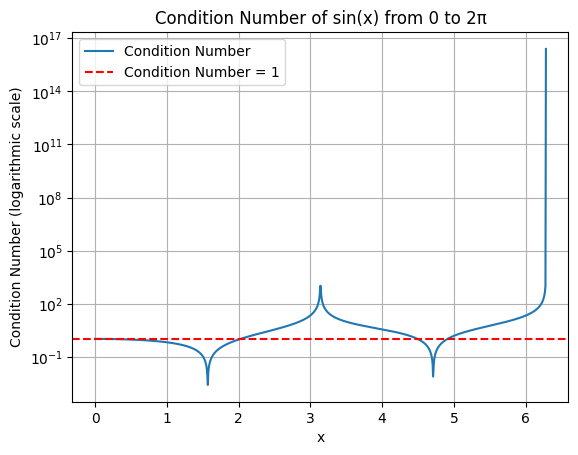

The range of x values where the problem is well-conditioned: 0.000000 to 2.028700
The range of x values where the problem is well-conditioned (starting at x = 0.001): 0.001000 to 2.028700


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sin, Derivative, cos

# Define the function f(x) using the first four terms of the Maclaurin series expansion for sin(x)
def maclaurin_sin_approx(x):
    return x - (x**3) / 6 + (x**5) / 120 - (x**7) / 5040

# Evaluate the function at x = π/6
pi = np.pi
x = pi / 6
f_x_approx = maclaurin_sin_approx(x)
print(f"Approximation of sin(x) at x = π/6 using the first four terms: {f_x_approx:.6f}")

# Perturb x by a small value delta_x and evaluate the function again
delta_x = 1e-6
x_perturbed = x + delta_x
f_x_perturbed_approx = maclaurin_sin_approx(x_perturbed)
print(f"Approximation of sin(x) at x = π/6 + δx: {f_x_perturbed_approx:.6f}")

# Symbolic computation using sympy
ex = symbols('ex')
expr = sin(ex)
print(f"Symbolic expression for sin(ex): {expr}")

# Calculate the derivative of the sin(x) function
expr_derivative = Derivative(expr, ex).doit()
print(f"Derivative of sin(x) with respect to x: {expr_derivative}")

# Calculate the condition number of the function at x = π/6
def condition_number(x):
    return abs((x * np.cos(x)) / np.sin(x))

condition_number_at_x = condition_number(x)
print(f"Condition number of sin(x) at x = π/6: {condition_number_at_x:.6f}")

# Generate a range of x values to analyze the condition number across 0 to 2π
x_values = np.linspace(0.000001, 2 * np.pi, 1000)  # Avoiding division by zero at x = 0
condition_numbers = condition_number(x_values)

# Plot the condition number on a logarithmic scale for better visualization
plt.plot(x_values, condition_numbers, label='Condition Number')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Condition Number (logarithmic scale)')
plt.title('Condition Number of sin(x) from 0 to 2π')
plt.axhline(y=1, color='r', linestyle='--', label='Condition Number = 1')
plt.legend()
plt.grid(True)
plt.show()

# Determine the range of x values where the problem is well-conditioned (Condition Number < 1)
well_conditioned_x_values = [i for i in np.arange(0.0000001, 3, 0.0001) if condition_number(i) < 1]
if well_conditioned_x_values:
    print(f"The range of x values where the problem is well-conditioned: {min(well_conditioned_x_values):.6f} to {max(well_conditioned_x_values):.6f}")
else:
    print("No well-conditioned range found within the specified interval.")

# Repeat the analysis with a slightly larger starting x value
well_conditioned_x_values = [i for i in np.arange(0.001, 3, 0.0001) if condition_number(i) < 1]
if well_conditioned_x_values:
    print(f"The range of x values where the problem is well-conditioned (starting at x = 0.001): {min(well_conditioned_x_values):.6f} to {max(well_conditioned_x_values):.6f}")
else:
    print("No well-conditioned range found within the specified interval.")
